In [1]:
from plotly import graph_objs as go
import plotly.express as px
import pandas as pd

In [11]:
df = pd.read_excel('state change_final.xlsx')
df.head(5)

,state,perception (1st week),perception (2nd week),perception (3rd week),perception (4th week),perception (5th week),perception (6th week),perception
0,AK,0.375174,0.536145,0.330952,0.473422,0.657356,0.480874,0.522947
1,AL,0.451923,0.600635,0.402066,0.516218,0.669164,0.511905,0.471211
2,AR,0.388517,0.475000,0.334278,0.446822,0.649225,0.480046,0.457893
3,AZ,0.410795,0.568406,0.354194,0.451626,0.621768,0.491471,0.472052
4,CA,0.327285,0.439875,0.346768,0.409041,0.570170,0.489569,0.421249


In [12]:
fig = go.Figure(data = go.Choropleth(locations = df['state'], 
                                     z = df['perception (1st week)'].astype(float), 
                                     locationmode = 'USA-states',
                                     colorscale = 'Blues',
                                     marker_line_color='white', 
                                     colorbar_title = "Perception"))

fig.update_layout(title_text = 'Perception for Supporting Reopen', 
                  geo_scope = 'usa')
fig.show()

In [18]:
fig = px.choropleth(df, locations='state', color='perception', 
                    locationmode="USA-states",
                    color_continuous_scale="Blues", 
                    range_color=(0.25, 0.75),
                    scope="usa")

fig.update_layout(title_text = 'average perception for supporting reopen (Apr.17 ~ Apr.24)', 
                  geo_scope = 'usa')

fig.show()

In [27]:
dff = pd.read_excel('correlation.xlsx')
dff.head(5)

,State,perception,bachelor degree %,health value,unemployment change %,case rate,average household income,median age,net democratic,black %,non-white %,male to female ratio
0,Alabama,0.522947,0.245,-0.838,-7.8,380,70090.35,38.9,-17,0.26,0.34,94.1
1,Alaska,0.471211,0.290,-0.115,-12.4,64,91268.57,34.0,-18,0.03,0.40,108.0
2,Arizona,0.472052,0.284,-0.105,-5.7,277,87823.18,37.4,0,0.04,0.46,98.9
3,Arkansas,0.457893,0.220,-0.672,-7.1,247,68079.14,37.9,-13,0.15,0.28,96.1
4,California,0.421249,0.326,0.431,-13.0,291,102375.47,36.3,20,0.05,0.63,98.9


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr
sns.set(style='white', font_scale=1.2)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams["axes.labelsize"] = 15

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



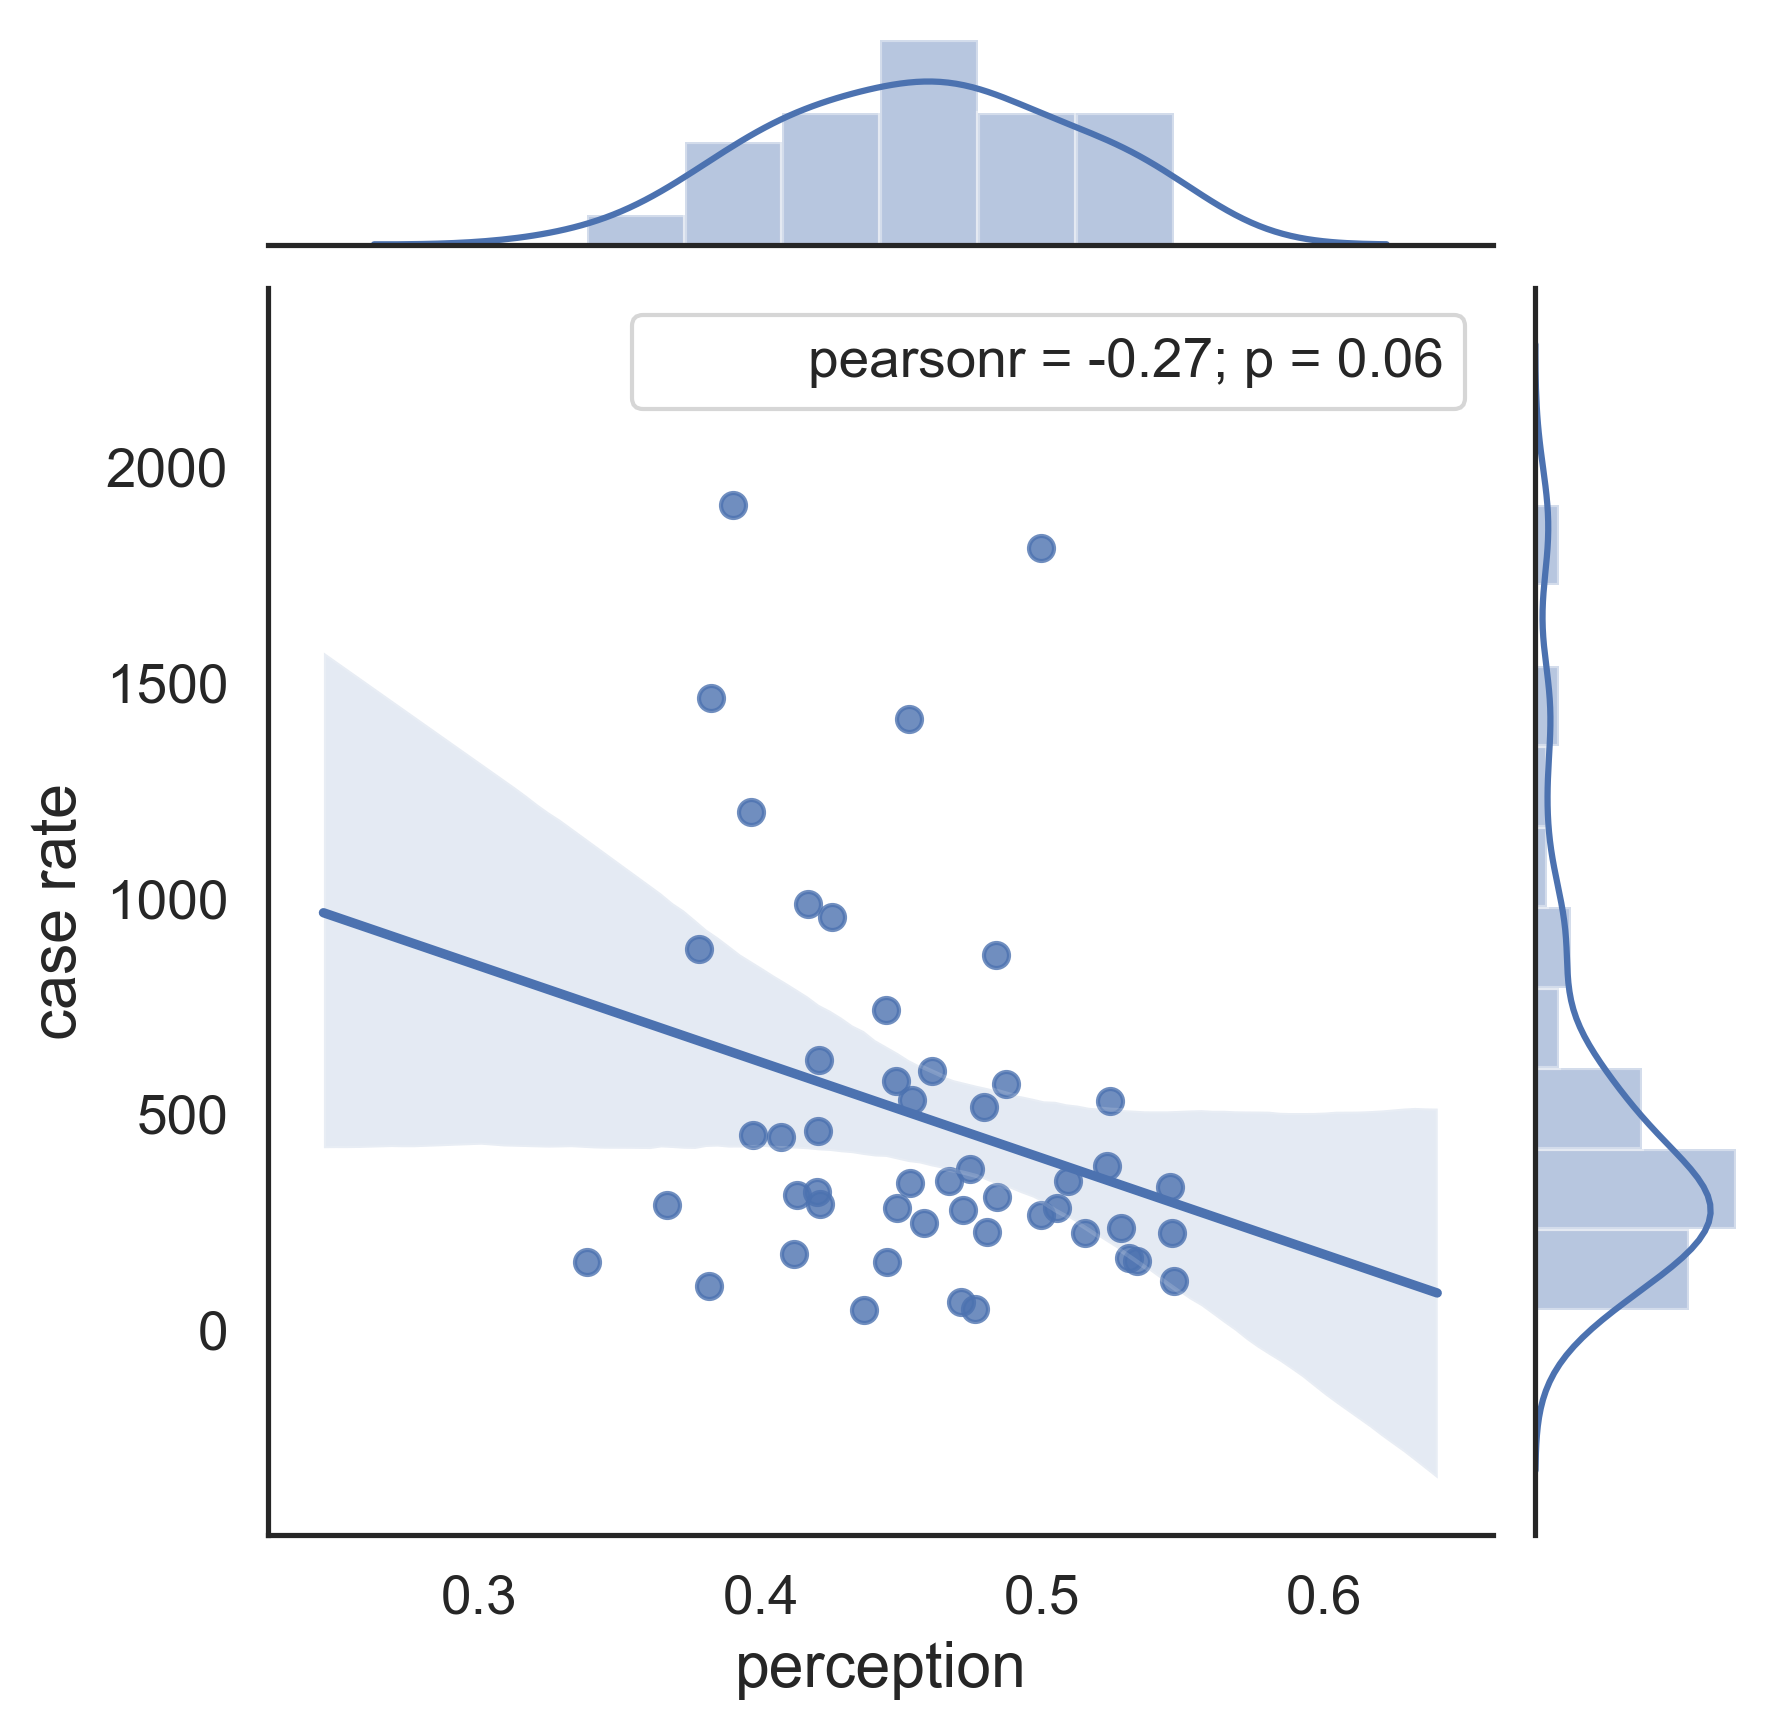

In [31]:
g = sns.jointplot(x="perception", y="case rate", data=dff, kind="reg").annotate(stats.pearsonr)

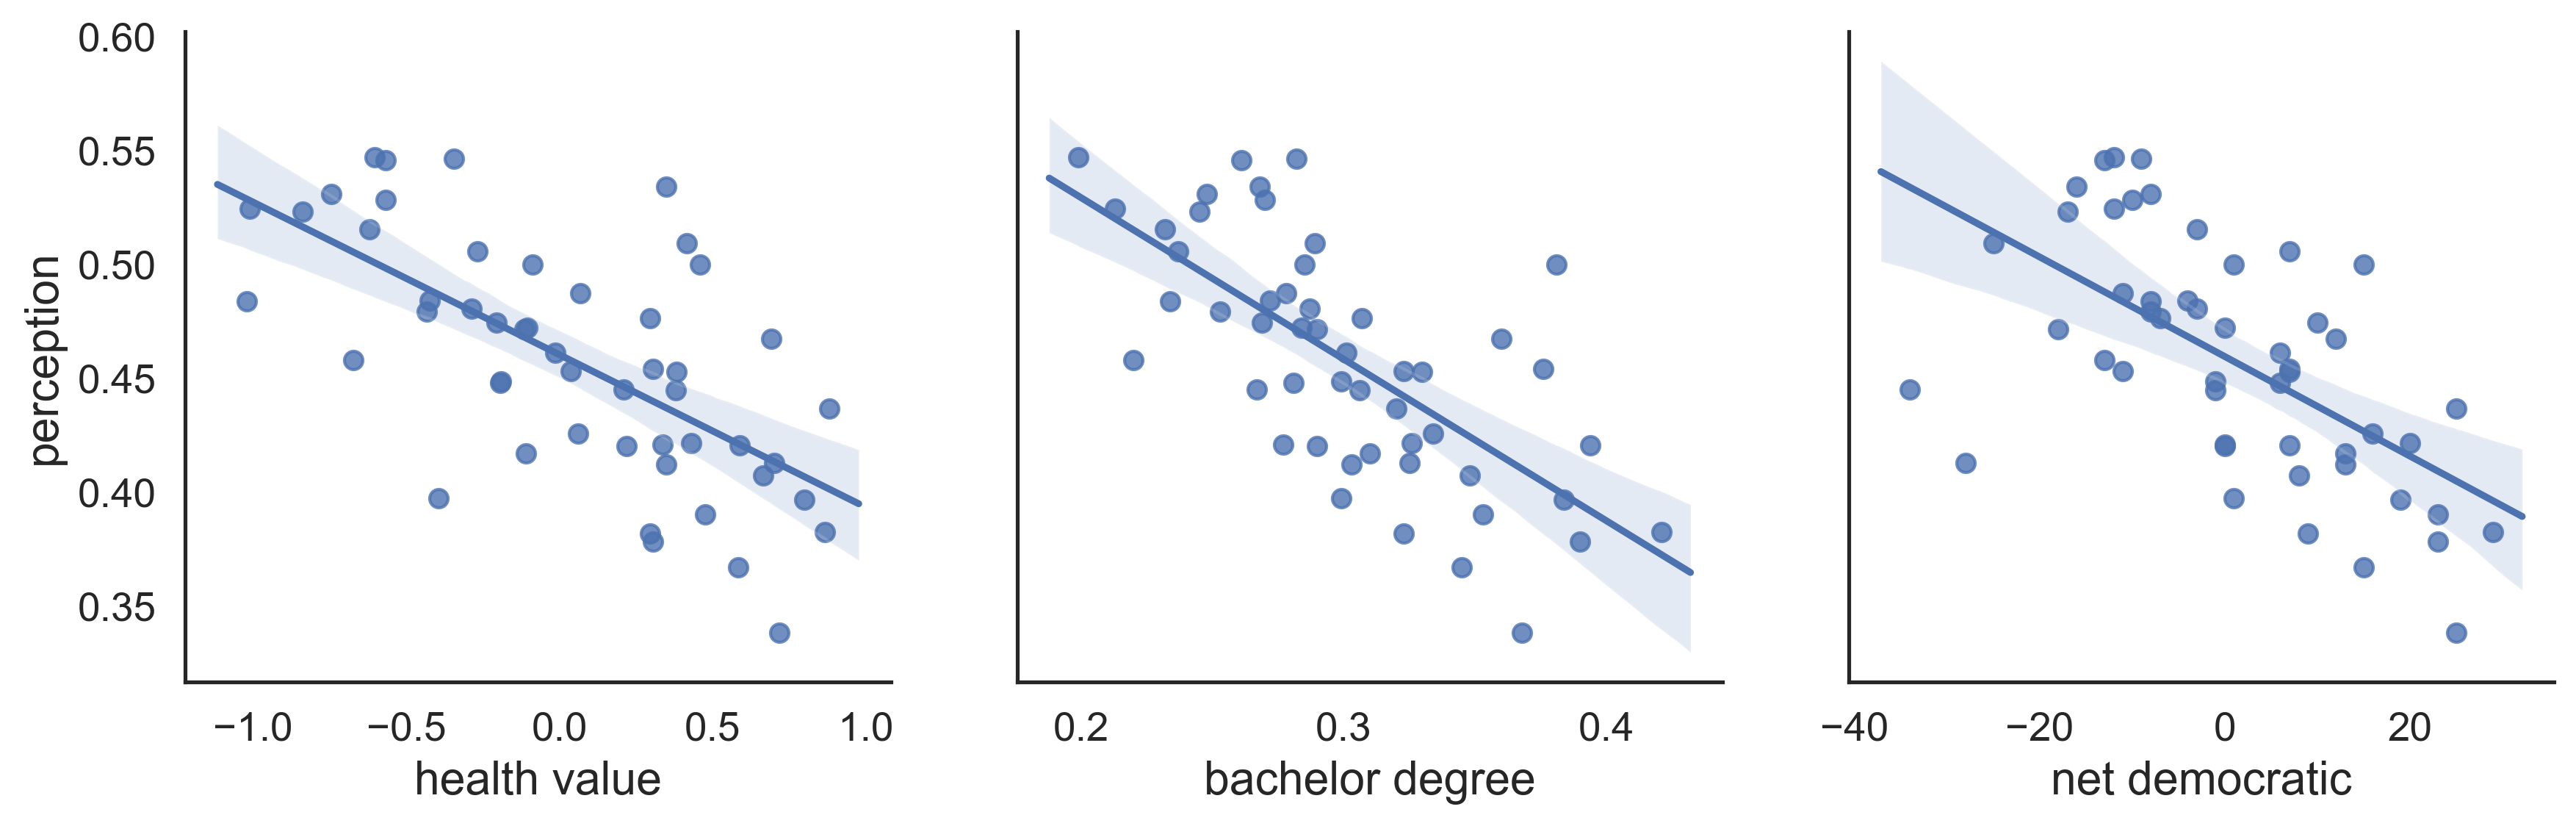

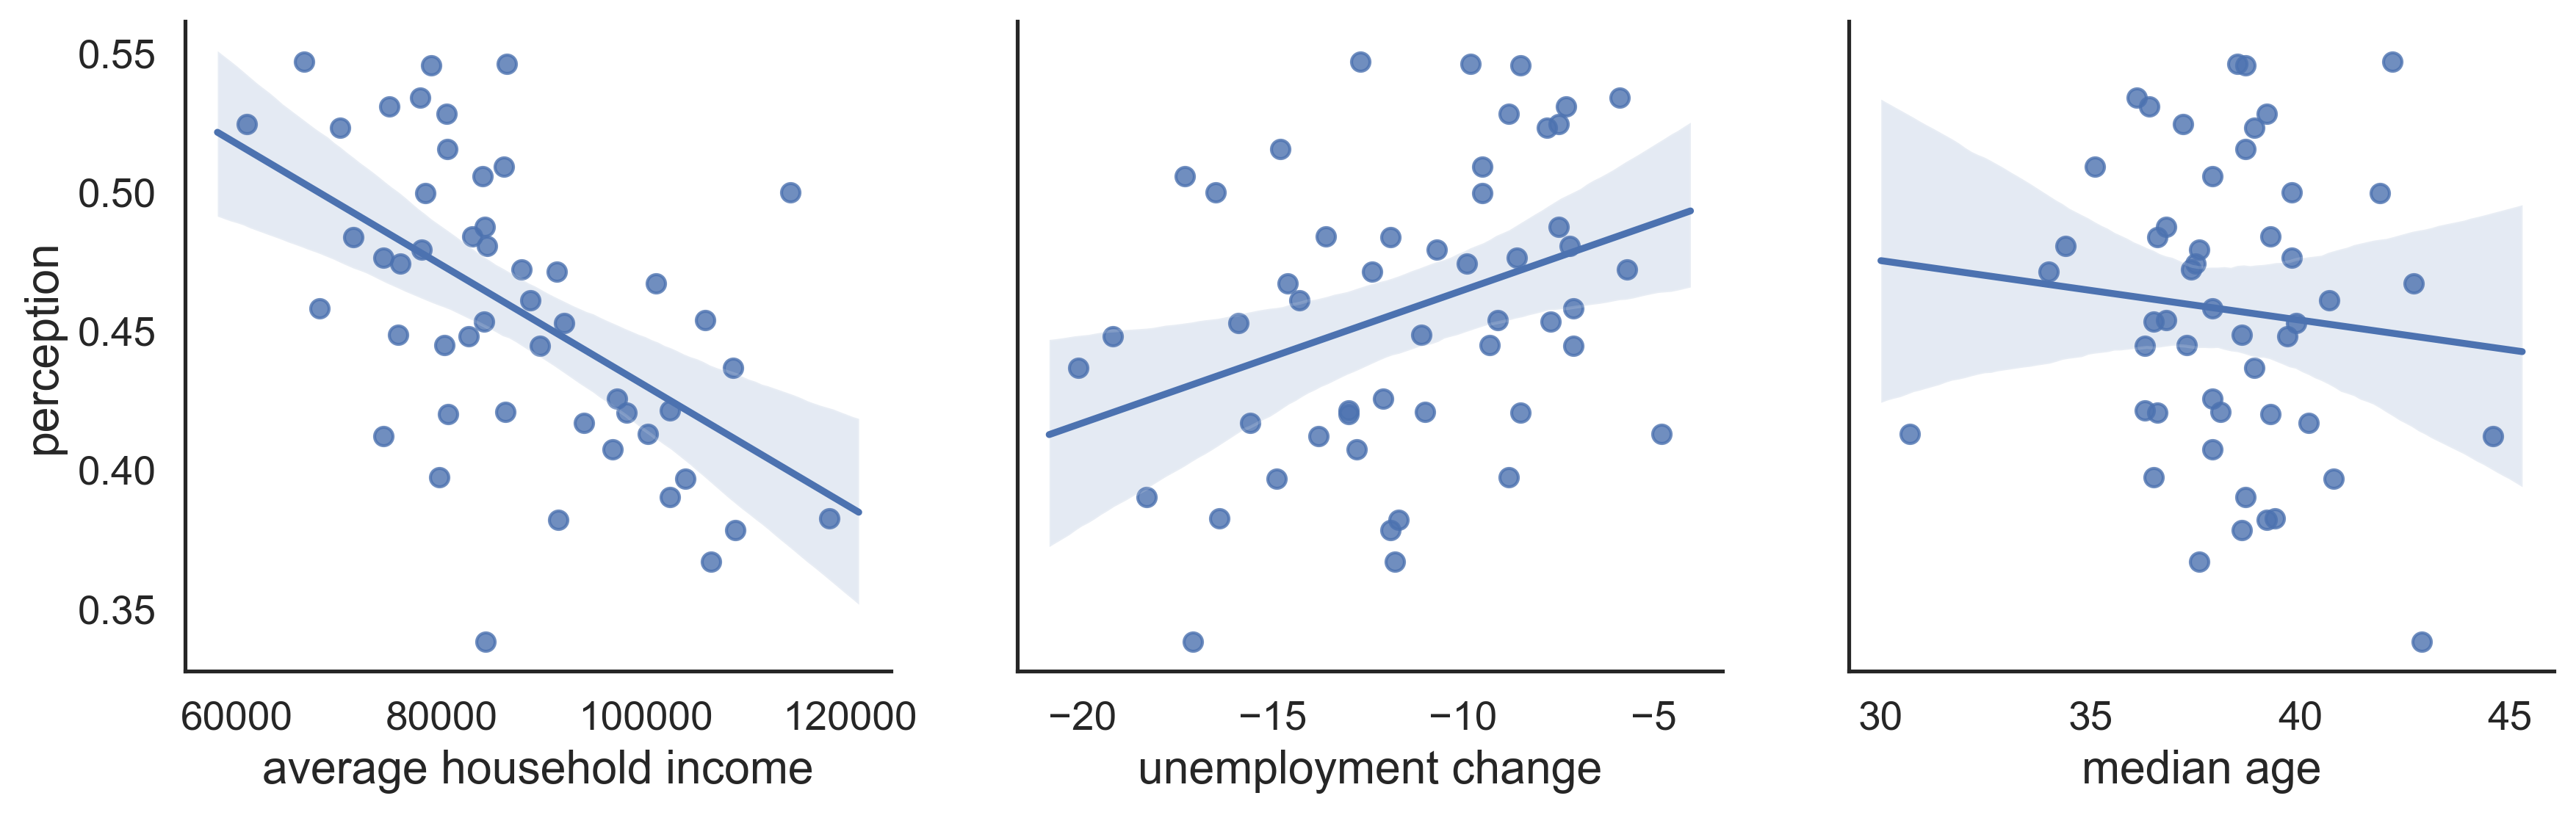

In [63]:
sns.pairplot(dff, x_vars=["health value", "bachelor degree", "net democratic"], 
             y_vars=["perception"],height=4, aspect=1, kind="reg")

sns.pairplot(dff, x_vars=["average household income", "unemployment change", "median age"], 
             y_vars=["perception"],height=4, aspect=1, kind="reg")